In [25]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt

In [2]:
data=pd.read_csv("data.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (91,93,163,169,172,173) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:

for i in data.columns:
    if data[i].dtype=="O":
        data.drop([i],axis=1,inplace=True)
        print(i)

groupname
country_or_region name
statusname
active_des_groupid_arr
relevant_des_groupid_arr
geo_typename
ggp_startdate
ggp_enddate
tek_groupid_arr
ed_religion1
ed_religion2
ed_religion3
ed_language1
ed_language2
ed_language3
ed_phenotype1
ed_phenotype2
ed_phenotype3


In [4]:
pd.set_option('max_rows', 10)
pd.set_option('max_columns', 500)


In [5]:
data

,gwgroupid,countries_gwid,year,isactive,isrelevant,groupsize,statusid,regaut,status_pwrrank,status_monopoly,status_dominant,status_senior,status_junior,status_selfexclusion,status_powerless,status_discrim,status_egip,status_excl,egip_groups_count,excl_groups_count,rlvt_groups_count,actv_groups_count,lpop,lsize,egippop,legippop,exclpop,lexclpop,discrimpop,ldiscrimpop,rbal,rlbal,downgraded1,downgraded_excl1,downgraded_regaut1,upgraded1,upgraded_excl1,upgraded_regaut1,downgraded2,downgraded_excl2,downgraded_regaut2,upgraded2,upgraded_excl2,upgraded_regaut2,downgraded5,downgraded_excl5,downgraded_regaut5,upgraded5,upgraded_excl5,upgraded_regaut5,downgraded10,downgraded_excl10,downgraded_regaut10,upgraded10,upgraded_excl10,upgraded_regaut10,downgraded_hist,downgraded_excl_hist,downgraded_regaut_hist,upgraded_hist,upgraded_excl_hist,upgraded_regaut_hist,family_downgraded1,family_downgraded_excl1,family_downgraded_regaut1,family_upgraded1,family_upgraded_excl1,family_upgraded_regaut1,family_downgraded2,family_downgraded_excl2,family_downgraded_regaut2,family_upgraded2,family_upgraded_excl2,family_upgraded_regaut2,family_downgraded5,family_downgraded_excl5,family_downgraded_regaut5,family_upgraded5,family_upgraded_excl5,family_upgraded_regaut5,family_downgraded10,family_downgraded_excl10,family_downgraded_regaut10,family_upgraded10,family_upgraded_excl10,family_upgraded_regaut10,family_isrelevant,active_anc_groupid,relevant_anc_groupid,onset_ko_flag,onset_ko_terr_flag,onset_ko_gov_flag,incidence_flag,incidence_terr_flag,incidence_gov_flag,onset_do_flag,onset_do_terr_flag,onset_do_gov_flag,family_onset_ko_flag,family_onset_ko_terr_flag,family_onset_ko_gov_flag,family_incidence_flag,family_incidence_terr_flag,family_incidence_gov_flag,warhist,warhist_terr,warhist_gov,family_warhist,family_warhist_terr,family_warhist_gov,peaceyears,peaceyears_terr,peaceyears_gov,family_peaceyears,family_peaceyears_terr,family_peaceyears_gov,geo_typeid,geo_concentrated,geo_statewide,geo_urban,geo_migrant,geo_dispersed,geo_unknown,area_sqkm,min_border_km,min_coastal_km,mean_coastal_km,min_capital_km,pop90_total,pop90_corr,pop00_total,pop00_corr,pop10_total,pop10_corr,nightlight_total,nightlight_corr,gdp90_total,gdp90_corr,gdp95_total,gdp95_corr,gdp00_total,gdp00_corr,gdp05_total,gdp05_corr,elevsd,meanelev,tek_count,tek_isrelevant,tek_excl,tek_egip,ed_rel1_size,ed_rel2_size,ed_rel3_size,ed_lang1_size,ed_lang2_size,ed_lang3_size,agri_gc_wsum,agri_gc_wmean,agri_gc_sum,agri_gc_mean,agri_gc_median,agri_gc_max,agri_gc_min,aquaveg_gc_wsum,aquaveg_gc_wmean,aquaveg_gc_sum,aquaveg_gc_mean,aquaveg_gc_median,aquaveg_gc_max,aquaveg_gc_min,barren_gc_wsum,barren_gc_wmean,barren_gc_sum,barren_gc_mean,barren_gc_median,barren_gc_max,barren_gc_min,cmr_max_wsum,cmr_max_wmean,cmr_max_sum,cmr_max_mean,cmr_max_median,cmr_max_max,cmr_max_min,cmr_mean_wsum,cmr_mean_wmean,cmr_mean_sum,cmr_mean_mean,cmr_mean_median,cmr_mean_max,cmr_mean_min,cmr_min_wsum,cmr_min_wmean,cmr_min_sum,cmr_min_mean,cmr_min_median,cmr_min_max,cmr_min_min,cmr_sd_wsum,cmr_sd_wmean,cmr_sd_sum,cmr_sd_mean,cmr_sd_median,cmr_sd_max,cmr_sd_min,diamsec_s_wsum,diamsec_s_wmean,diamsec_s_sum,diamsec_s_mean,diamsec_s_median,diamsec_s_max,diamsec_s_min,diamprim_s_wsum,diamprim_s_wmean,diamprim_s_sum,diamprim_s_mean,diamprim_s_median,diamprim_s_max,diamprim_s_min,forest_gc_wsum,forest_gc_wmean,forest_gc_sum,forest_gc_mean,forest_gc_median,forest_gc_max,forest_gc_min,gem_s_wsum,gem_s_wmean,gem_s_sum,gem_s_mean,gem_s_median,gem_s_max,gem_s_min,goldplacer_s_wsum,goldplacer_s_wmean,goldplacer_s_sum,goldplacer_s_mean,goldplacer_s_median,goldplacer_s_max,goldplacer_s_min,goldvein_s_wsum,goldvein_s_wmean,goldvein_s_sum,goldvein_s_mean,goldvein_s_median,goldvein_s_max,goldvein_s_min,goldsurface_s_wsum,goldsurface_s_wmean,goldsurface_s_sum,goldsurface_s_mean,goldsurface_s_median,goldsurface_s_max,goldsurface_s_min,growend_wsum,growend_wmean,growend_sum,growend_mean,growend_median,growend_max,growend_min,growstart_wsum,growstart_w

In [6]:
data[data.isnull()]=0

In [8]:
corrdata=data.corr()

In [9]:
corrdata

,gwgroupid,countries_gwid,year,isactive,isrelevant,groupsize,statusid,regaut,status_pwrrank,status_monopoly,status_dominant,status_senior,status_junior,status_selfexclusion,status_powerless,status_discrim,status_egip,status_excl,egip_groups_count,excl_groups_count,rlvt_groups_count,actv_groups_count,lpop,lsize,egippop,legippop,exclpop,lexclpop,discrimpop,ldiscrimpop,rbal,rlbal,downgraded1,downgraded_excl1,downgraded_regaut1,upgraded1,upgraded_excl1,upgraded_regaut1,downgraded2,downgraded_excl2,downgraded_regaut2,upgraded2,upgraded_excl2,upgraded_regaut2,downgraded5,downgraded_excl5,downgraded_regaut5,upgraded5,upgraded_excl5,upgraded_regaut5,downgraded10,downgraded_excl10,downgraded_regaut10,upgraded10,upgraded_excl10,upgraded_regaut10,downgraded_hist,downgraded_excl_hist,downgraded_regaut_hist,upgraded_hist,upgraded_excl_hist,upgraded_regaut_hist,family_downgraded1,family_downgraded_excl1,family_downgraded_regaut1,family_upgraded1,family_upgraded_excl1,family_upgraded_regaut1,family_downgraded2,family_downgraded_excl2,family_downgraded_regaut2,family_upgraded2,family_upgraded_excl2,family_upgraded_regaut2,family_downgraded5,family_downgraded_excl5,family_downgraded_regaut5,family_upgraded5,family_upgraded_excl5,family_upgraded_regaut5,family_downgraded10,family_downgraded_excl10,family_downgraded_regaut10,family_upgraded10,family_upgraded_excl10,family_upgraded_regaut10,family_isrelevant,active_anc_groupid,relevant_anc_groupid,onset_ko_flag,onset_ko_terr_flag,onset_ko_gov_flag,incidence_flag,incidence_terr_flag,incidence_gov_flag,onset_do_flag,onset_do_terr_flag,onset_do_gov_flag,family_onset_ko_flag,family_onset_ko_terr_flag,family_onset_ko_gov_flag,family_incidence_flag,family_incidence_terr_flag,family_incidence_gov_flag,warhist,warhist_terr,warhist_gov,family_warhist,family_warhist_terr,family_warhist_gov,peaceyears,peaceyears_terr,peaceyears_gov,family_peaceyears,family_peaceyears_terr,family_peaceyears_gov,geo_typeid,geo_concentrated,geo_statewide,geo_urban,geo_migrant,geo_dispersed,geo_unknown,area_sqkm,min_border_km,min_coastal_km,mean_coastal_km,min_capital_km,pop90_total,pop90_corr,pop00_total,pop00_corr,pop10_total,pop10_corr,nightlight_total,nightlight_corr,gdp90_total,gdp90_corr,gdp95_total,gdp95_corr,gdp00_total,gdp00_corr,gdp05_total,gdp05_corr,elevsd,meanelev,tek_count,tek_isrelevant,tek_excl,tek_egip,ed_rel1_size,ed_rel2_size,ed_rel3_size,ed_lang1_size,ed_lang2_size,ed_lang3_size,agri_gc_wsum,agri_gc_wmean,agri_gc_sum,agri_gc_mean,agri_gc_median,agri_gc_max,agri_gc_min,aquaveg_gc_wsum,aquaveg_gc_wmean,aquaveg_gc_sum,aquaveg_gc_mean,aquaveg_gc_median,aquaveg_gc_max,aquaveg_gc_min,barren_gc_wsum,barren_gc_wmean,barren_gc_sum,barren_gc_mean,barren_gc_median,barren_gc_max,barren_gc_min,cmr_max_wsum,cmr_max_wmean,cmr_max_sum,cmr_max_mean,cmr_max_median,cmr_max_max,cmr_max_min,cmr_mean_wsum,cmr_mean_wmean,cmr_mean_sum,cmr_mean_mean,cmr_mean_median,cmr_mean_max,cmr_mean_min,cmr_min_wsum,cmr_min_wmean,cmr_min_sum,cmr_min_mean,cmr_min_median,cmr_min_max,cmr_min_min,cmr_sd_wsum,cmr_sd_wmean,cmr_sd_sum,cmr_sd_mean,cmr_sd_median,cmr_sd_max,cmr_sd_min,diamsec_s_wsum,diamsec_s_wmean,diamsec_s_sum,diamsec_s_mean,diamsec_s_median,diamsec_s_max,diamsec_s_min,diamprim_s_wsum,diamprim_s_wmean,diamprim_s_sum,diamprim_s_mean,diamprim_s_median,diamprim_s_max,diamprim_s_min,forest_gc_wsum,forest_gc_wmean,forest_gc_sum,forest_gc_mean,forest_gc_median,forest_gc_max,forest_gc_min,gem_s_wsum,gem_s_wmean,gem_s_sum,gem_s_mean,gem_s_median,gem_s_max,gem_s_min,goldplacer_s_wsum,goldplacer_s_wmean,goldplacer_s_sum,goldplacer_s_mean,goldplacer_s_median,goldplacer_s_max,goldplacer_s_min,goldvein_s_wsum,goldvein_s_wmean,goldvein_s_sum,goldvein_s_mean,goldvein_s_median,goldvein_s_max,goldvein_s_min,goldsurface_s_wsum,goldsurface_s_wmean,goldsurface_s_sum,goldsurface_s_mean,goldsurface_s_median,goldsurface_s_max,goldsurface_s_min,growend_wsum,growend_wmean,growend_sum,growend_mean,growend_median,growend_max,growend_min,growstart_wsum,growstart_w

In [10]:
corrdata.to_csv("corrdata.csv")

<IPython.core.display.Javascript object>


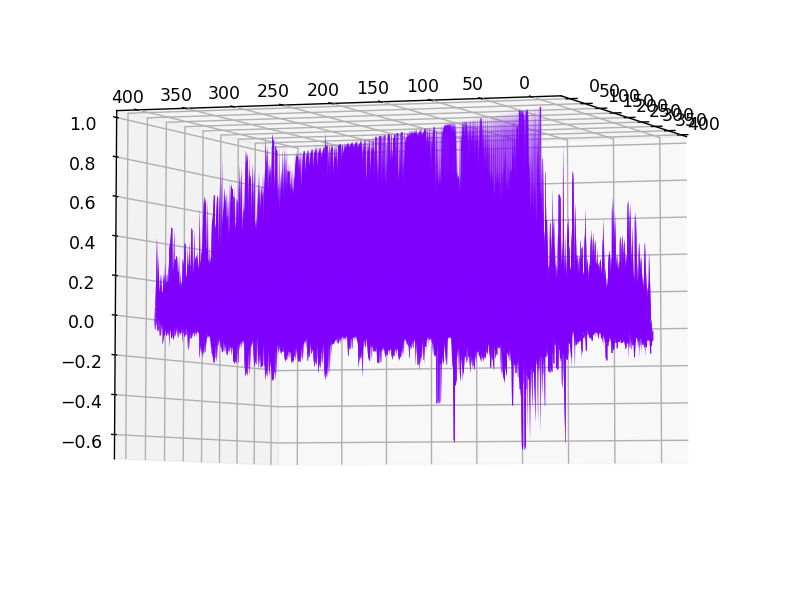

In [28]:
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(0, 394)
Y = np.arange(0, 394)
X, Y = np.meshgrid(X, Y)
ax.plot_surface( X, Y, corrdata, rstride=1, cstride=1,cmap="rainbow" )

plt.show()

In [19]:
%matplotlib notebook

In [54]:
corrdata[corrdata.isnull()]=0

In [72]:
corr=corrdata.values

In [92]:
sumcorr=[abs(corr[i]).sum() for i in range(394)]
sumcorr=np.array(sumcorr)

In [95]:
sumcorrpd=pd.DataFrame(data=sumcorr,index=corrdata.index)

In [96]:
sumcorrpd

,0
gwgroupid,31.224200
countries_gwid,31.224017
year,20.588259
isactive,49.087759
isrelevant,79.336463
...,...
water_gc_sum,59.941137
water_gc_mean,31.829678
water_gc_median,22.369049
water_gc_max,67.157067


In [99]:
sumcorrpdsorted=sumcorrpd.sort_values(by=[0])

In [100]:
sumcorrpdsorted

,0
goldplacer_s_median,0.000000
geo_unknown,0.000000
diamprim_s_median,0.000000
goldsurface_s_median,0.000000
diamsec_s_median,0.000000
...,...
geo_concentrated,105.477948
landarea_median,105.486683
landarea_mean,106.574170
landarea_wmean,107.090996
